In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing=fetch_california_housing()


X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',optimizer='sgd')
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8462 - val_loss: 10.3067
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5576 - val_loss: 3.2091
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4389 - val_loss: 0.7954
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4119 - val_loss: 0.3705
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3965 - val_loss: 0.3660
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3866 - val_loss: 0.3624
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3807 - val_loss: 0.3632
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3775 - val_loss: 0.3592
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3719 - val_loss: 0.3570
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3713 - val_loss: 0.356

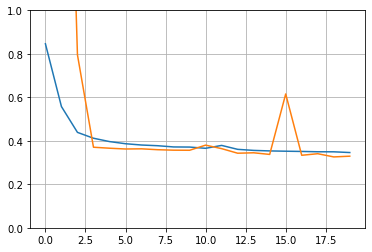

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [10]:
X_new=X_test[:3]
y_pred=model.predict(X_new)

y_pred

array([[0.6562047],
       [1.6205418],
       [4.1707416]], dtype=float32)

In [11]:
print(y_test[:3])

[0.477   0.458   5.00001]
